In [1]:
%pip install pandas

In [2]:
# EDA exploratory data analysis
import pandas as pd 
import numpy as np # numerical calculation
# visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

from sklearn.preprocessing import StandardScaler
# from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Example model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score,f1_score

In [4]:


# Display the first few rows of the dataframe
print(data.head())

NameError: name 'data' is not defined

In [ ]:
data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'Showed_up',
       'Date.diff'],
      dtype='object')

In [ ]:
print(data.head())

      PatientId  AppointmentID Gender ScheduledDay AppointmentDay  Age  \
0  2.987250e+13        5642903      F   2016-04-29     2016-04-29   62   
1  5.589978e+14        5642503      M   2016-04-29     2016-04-29   56   
2  4.262962e+12        5642549      F   2016-04-29     2016-04-29   62   
3  8.679512e+11        5642828      F   2016-04-29     2016-04-29    8   
4  8.841186e+12        5642494      F   2016-04-29     2016-04-29   56   

       Neighbourhood  Scholarship  Hipertension  Diabetes  Alcoholism  \
0    JARDIM DA PENHA        False          True     False       False   
1    JARDIM DA PENHA        False         False     False       False   
2      MATA DA PRAIA        False         False     False       False   
3  PONTAL DE CAMBURI        False         False     False       False   
4    JARDIM DA PENHA        False          True      True       False   

   Handcap  SMS_received  Showed_up  Date.diff  
0    False         False       True          0  
1    False        

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106987 entries, 0 to 106986
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       106987 non-null  float64
 1   AppointmentID   106987 non-null  int64  
 2   Gender          106987 non-null  object 
 3   ScheduledDay    106987 non-null  object 
 4   AppointmentDay  106987 non-null  object 
 5   Age             106987 non-null  int64  
 6   Neighbourhood   106987 non-null  object 
 7   Scholarship     106987 non-null  bool   
 8   Hipertension    106987 non-null  bool   
 9   Diabetes        106987 non-null  bool   
 10  Alcoholism      106987 non-null  bool   
 11  Handcap         106987 non-null  bool   
 12  SMS_received    106987 non-null  bool   
 13  Showed_up       106987 non-null  bool   
 14  Date.diff       106987 non-null  int64  
dtypes: bool(7), float64(1), int64(3), object(4)
memory usage: 7.2+ MB
None


In [ ]:

# Step 4: Rename columns for consistency
data.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap'}, inplace=True)_
data

In [ ]:
print(data.isnull().sum())

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SMS_received      0
Showed_up         0
Date.diff         0
dtype: int64

In [ ]:
print(data.describe())

          PatientId  AppointmentID            Age      Date.diff
count  1.069870e+05   1.069870e+05  106987.000000  106987.000000
mean   1.472814e+14   5.675434e+06      38.316085      10.166721
std    2.558267e+14   7.133274e+04      22.466214      15.263508
min    3.921784e+04   5.030230e+06       1.000000      -6.000000
25%    4.173523e+12   5.640490e+06      19.000000       0.000000
50%    3.172463e+13   5.680744e+06      38.000000       4.000000
75%    9.433600e+13   5.725634e+06      56.000000      14.000000
max    9.999816e+14   5.790484e+06     115.000000     179.000000


In [ ]:
# 1. Identify numerical and categorical columns
num_cols = data.select_dtypes(include=['float64', 'int64']).columns
cat_cols = data.select_dtypes(include=['object']).columns


In [ ]:

data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'])
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])

In [ ]:
print(cat_cols)

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Neighbourhood'], dtype='object')


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106987 entries, 0 to 106986
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       106987 non-null  float64       
 1   AppointmentID   106987 non-null  int64         
 2   Gender          106987 non-null  object        
 3   ScheduledDay    106987 non-null  datetime64[ns]
 4   AppointmentDay  106987 non-null  datetime64[ns]
 5   Age             106987 non-null  int64         
 6   Neighbourhood   106987 non-null  object        
 7   Scholarship     106987 non-null  bool          
 8   Hypertension    106987 non-null  bool          
 9   Diabetes        106987 non-null  bool          
 10  Alcoholism      106987 non-null  bool          
 11  Handicap        106987 non-null  bool          
 12  SMS_received    106987 non-null  bool          
 13  Showed_up       106987 non-null  bool          
 14  Date.diff       106987 non-null  int

In [ ]:
print(data.isnull().sum())

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SMS_received      0
Showed_up         0
Date.diff         0
dtype: int64


In [ ]:
# One-hot encoding for categorical columns 'Gender' and 'Neighbourhood'
data = pd.get_dummies(data, columns=['Gender', 'Neighbourhood'], drop_first=True)

In [ ]:
data = pd.get_dummies(data, columns=['Gender', 'Neighbourhood'], drop_first=True)

In [ ]:
print(data)

           PatientId  AppointmentID ScheduledDay AppointmentDay  Age  \
0       2.987250e+13        5642903   2016-04-29     2016-04-29   62   
1       5.589978e+14        5642503   2016-04-29     2016-04-29   56   
2       4.262962e+12        5642549   2016-04-29     2016-04-29   62   
3       8.679512e+11        5642828   2016-04-29     2016-04-29    8   
4       8.841186e+12        5642494   2016-04-29     2016-04-29   56   
...              ...            ...          ...            ...  ...   
106982  2.572134e+12        5651768   2016-05-03     2016-06-07   56   
106983  3.596266e+12        5650093   2016-05-03     2016-06-07   51   
106984  1.557663e+13        5630692   2016-04-27     2016-06-07   21   
106985  9.213493e+13        5630323   2016-04-27     2016-06-07   38   
106986  3.775115e+14        5629448   2016-04-27     2016-06-07   54   

        Scholarship  Hypertension  Diabetes  Alcoholism  Handicap  ...  \
0             False          True     False       False     F

In [ ]:
# Drop unnecessary ID columns
data.drop(columns=['PatientId', 'AppointmentID'], inplace=True)
data

In [ ]:
print(data.isnull().sum())

ScheduledDay                   0
AppointmentDay                 0
Age                            0
Scholarship                    0
Hypertension                   0
                              ..
Neighbourhood_SÃO JOSÉ         0
Neighbourhood_SÃO PEDRO        0
Neighbourhood_TABUAZEIRO       0
Neighbourhood_UNIVERSITÁRIO    0
Neighbourhood_VILA RUBIM       0
Length: 92, dtype: int64


In [ ]:
# Extract day of the week for appointments and scheduled day
data['ScheduledDay_DayOfWeek'] = data['ScheduledDay'].dt.dayofweek
data['AppointmentDay_DayOfWeek'] = data['AppointmentDay'].dt.dayofweek


In [ ]:
print(data['AppointmentDay_DayOfWeek'])

0         4
1         4
2         4
3         4
4         4
         ..
106982    1
106983    1
106984    1
106985    1
106986    1
Name: AppointmentDay_DayOfWeek, Length: 106987, dtype: int32


In [ ]:
print(data['ScheduledDay_DayOfWeek'] )

0         4
1         4
2         4
3         4
4         4
         ..
106982    1
106983    1
106984    2
106985    2
106986    2
Name: ScheduledDay_DayOfWeek, Length: 106987, dtype: int32


In [ ]:
print(data.columns)

Index(['ScheduledDay', 'AppointmentDay', 'Age', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'Showed_up',
       'Date.diff', 'Gender_M', 'Neighbourhood_ANDORINHAS',
       'Neighbourhood_ANTÔNIO HONÓRIO', 'Neighbourhood_ARIOVALDO FAVALESSA',
       'Neighbourhood_BARRO VERMELHO', 'Neighbourhood_BELA VISTA',
       'Neighbourhood_BENTO FERREIRA', 'Neighbourhood_BOA VISTA',
       'Neighbourhood_BONFIM', 'Neighbourhood_CARATOÍRA',
       'Neighbourhood_CENTRO', 'Neighbourhood_COMDUSA',
       'Neighbourhood_CONQUISTA', 'Neighbourhood_CONSOLAÇÃO',
       'Neighbourhood_CRUZAMENTO', 'Neighbourhood_DA PENHA',
       'Neighbourhood_DE LOURDES', 'Neighbourhood_DO CABRAL',
       'Neighbourhood_DO MOSCOSO', 'Neighbourhood_DO QUADRO',
       'Neighbourhood_ENSEADA DO SUÁ', 'Neighbourhood_ESTRELINHA',
       'Neighbourhood_FONTE GRANDE', 'Neighbourhood_FORTE SÃO JOÃO',
       'Neighbourhood_FRADINHOS', 'Neighbourhood_GOIABEIRAS',
       'Neighbourh

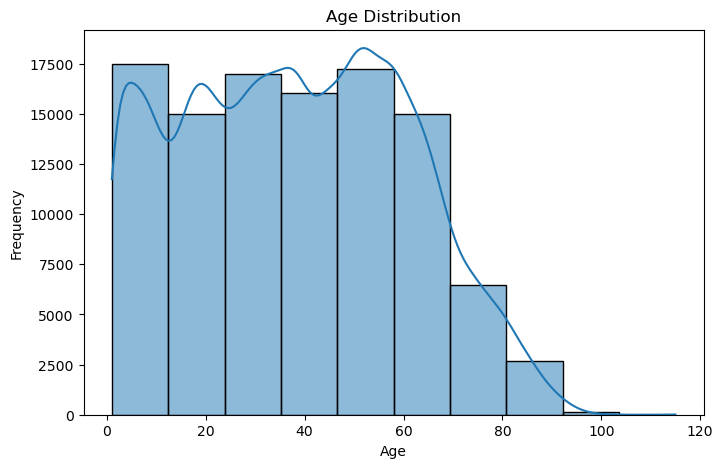

In [ ]:
# Distribution of Age
plt.figure(figsize=(8, 5))
sns.histplot(data['Age'], bins=10, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_10528\1069361381.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=no_show_counts.index, y=no_show_counts.values, palette="viridis")


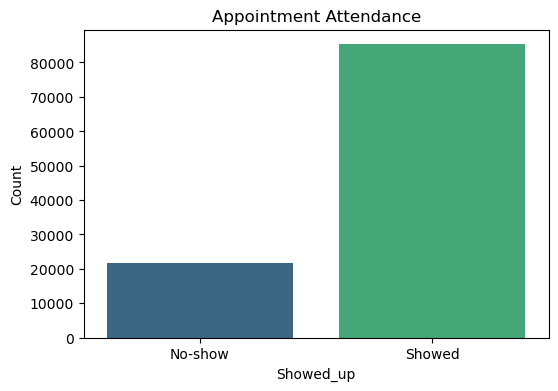

In [ ]:
# Appointment No-Show Analysis
no_show_counts = data['Showed_up'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=no_show_counts.index, y=no_show_counts.values, palette="viridis")
plt.xticks([0, 1], ['No-show', 'Showed'])
plt.title("Appointment Attendance")
plt.ylabel("Count")
plt.show()

In [ ]:
# Analyzing the impact of SMS on attendance
sms_vs_show = data.groupby(['SMS_received', 'Showed_up']).size().unstack()
sms_vs_show

Showed_up,False,True
SMS_received,,
False,12112,60290
True,9568,25017


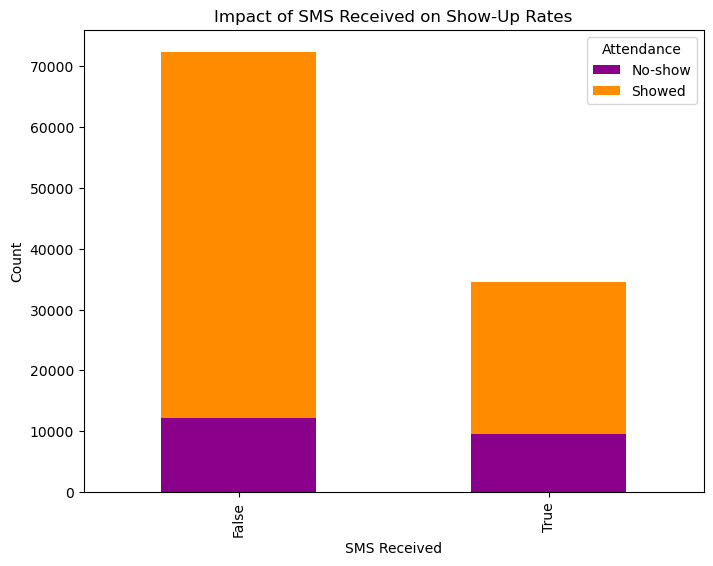

In [ ]:
sms_vs_show.plot(kind='bar', stacked=True, color=['#8B008B', '#FF8C00'], figsize=(8, 6))
plt.title("Impact of SMS Received on Show-Up Rates")
plt.ylabel("Count")
plt.xlabel("SMS Received")
plt.legend(["No-show", "Showed"], title="Attendance")
plt.show()

In [ ]:
data.corr()

,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Showed_up,...,Neighbourhood_SOLON BORGES,Neighbourhood_SÃO BENEDITO,Neighbourhood_SÃO CRISTÓVÃO,Neighbourhood_SÃO JOSÉ,Neighbourhood_SÃO PEDRO,Neighbourhood_TABUAZEIRO,Neighbourhood_UNIVERSITÁRIO,Neighbourhood_VILA RUBIM,ScheduledDay_DayOfWeek,AppointmentDay_DayOfWeek
ScheduledDay,1.000000,0.604808,-0.024109,0.023316,0.012334,0.022470,0.032760,0.014480,-0.255584,0.161646,...,-0.009492,0.020964,-0.013094,0.024810,0.034168,0.005844,0.005199,-0.016154,-0.044288,-0.064520
AppointmentDay,0.604808,1.000000,0.010805,-0.001483,-0.001904,0.001069,0.002698,-0.003673,0.094904,0.021425,...,-0.000612,0.001764,-0.005183,-0.003673,-0.004694,-0.003642,0.001342,-0.011703,-0.052977,-0.117855
Age,-0.024109,0.010805,1.000000,-0.112699,0.502091,0.290631,0.090391,0.079726,0.005251,0.067025,...,0.023734,-0.038731,0.011605,-0.016265,-0.004734,-0.015487,0.006697,0.028621,0.007503,0.000548
Scholarship,0.023316,-0.001483,-0.112699,1.000000,-0.024530,-0.027622,0.033527,-0.010465,-0.000010,-0.029370,...,-0.004622,0.074302,-0.002020,-0.002066,0.017786,0.041202,-0.008473,-0.004865,-0.005582,-0.000780
Hypertension,0.012334,-0.001904,0.502091,-0.024530,1.000000,0.430827,0.085459,0.082909,-0.008805,0.037280,...,-0.022934,0.003887,0.035013,0.023448,0.030415,0.013566,0.006323,0.016956,-0.000669,0.002716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Neighbourhood_TABUAZEIRO,0.005844,-0.003642,-0.015487,0.041202,0.013566,0.003415,-0.012238,0.006620,-0.004578,0.008394,...,-0.011100,-0.019271,-0.022197,-0.022716,-0.025515,1.000000,-0.006406,-0.015059,-0.002388,0.000219
Neighbourhood_UNIVERSITÁRIO,0.005199,0.001342,0.006697,-0.008473,0.006323,0.005498,-0.003915,-0.000281,0.002761,-0.000868,...,-0.002449,-0.004252,-0.004897,-0.005012,-0.005629,-0.006406,1.000000,-0.003322,-0.002928,0.000195
Neighbourhood_VILA RUBIM,-0.016154,-0.011703,0.028621,-0.004865,0.016956,0.011569,-0.005522,0.015369,0.009575,0.007688,...,-0.005756,-0.009994,-0.011511,-0.011780,-0.013232,-0.015059,-0.003322,1.000000,-0.006292,-0.005853
ScheduledDay_DayOfWeek,-0.044288,-0.052977,0.007503,-0.005582,-0.000669,-0.001156,0.006256,0.000723,0.078614,-0.006087,...,-0.002381,-0.004496,-0.000603,0.028662,0.010121,-0.002388,-0.002928,-0.006292,1.000000,0.324909


In [ ]:
# Drop the Neighbourhood column
data_without_neighbourhood = data.drop(columns=['Neighbourhood_ANDORINHAS',
       'Neighbourhood_ANTÔNIO HONÓRIO', 'Neighbourhood_ARIOVALDO FAVALESSA',
       'Neighbourhood_BARRO VERMELHO', 'Neighbourhood_BELA VISTA',
       'Neighbourhood_BENTO FERREIRA', 'Neighbourhood_BOA VISTA',
       'Neighbourhood_BONFIM', 'Neighbourhood_CARATOÍRA',
       'Neighbourhood_CENTRO', 'Neighbourhood_COMDUSA',
       'Neighbourhood_CONQUISTA', 'Neighbourhood_CONSOLAÇÃO',
       'Neighbourhood_CRUZAMENTO', 'Neighbourhood_DA PENHA',
       'Neighbourhood_DE LOURDES', 'Neighbourhood_DO CABRAL',
       'Neighbourhood_DO MOSCOSO', 'Neighbourhood_DO QUADRO',
       'Neighbourhood_ENSEADA DO SUÁ', 'Neighbourhood_ESTRELINHA',
       'Neighbourhood_FONTE GRANDE', 'Neighbourhood_FORTE SÃO JOÃO',
       'Neighbourhood_FRADINHOS', 'Neighbourhood_GOIABEIRAS',
       'Neighbourhood_GRANDE VITÓRIA', 'Neighbourhood_GURIGICA',
       'Neighbourhood_HORTO', 'Neighbourhood_ILHA DAS CAIEIRAS',
       'Neighbourhood_ILHA DE SANTA MARIA', 'Neighbourhood_ILHA DO BOI',
       'Neighbourhood_ILHA DO FRADE', 'Neighbourhood_ILHA DO PRÍNCIPE',
       'Neighbourhood_ILHAS OCEÂNICAS DE TRINDADE', 'Neighbourhood_INHANGUETÁ',
       'Neighbourhood_ITARARÉ', 'Neighbourhood_JABOUR',
       'Neighbourhood_JARDIM CAMBURI', 'Neighbourhood_JARDIM DA PENHA',
       'Neighbourhood_JESUS DE NAZARETH', 'Neighbourhood_JOANA D´ARC',
       'Neighbourhood_JUCUTUQUARA', 'Neighbourhood_MARIA ORTIZ',
       'Neighbourhood_MARUÍPE', 'Neighbourhood_MATA DA PRAIA',
       'Neighbourhood_MONTE BELO', 'Neighbourhood_MORADA DE CAMBURI',
       'Neighbourhood_MÁRIO CYPRESTE', 'Neighbourhood_NAZARETH',
       'Neighbourhood_NOVA PALESTINA', 'Neighbourhood_PARQUE INDUSTRIAL',
       'Neighbourhood_PARQUE MOSCOSO', 'Neighbourhood_PIEDADE',
       'Neighbourhood_PONTAL DE CAMBURI', 'Neighbourhood_PRAIA DO CANTO',
       'Neighbourhood_PRAIA DO SUÁ', 'Neighbourhood_REDENÇÃO',
       'Neighbourhood_REPÚBLICA', 'Neighbourhood_RESISTÊNCIA',
       'Neighbourhood_ROMÃO', 'Neighbourhood_SANTA CECÍLIA',
       'Neighbourhood_SANTA CLARA', 'Neighbourhood_SANTA HELENA',
       'Neighbourhood_SANTA LUÍZA', 'Neighbourhood_SANTA LÚCIA',
       'Neighbourhood_SANTA MARTHA', 'Neighbourhood_SANTA TEREZA',
       'Neighbourhood_SANTO ANDRÉ', 'Neighbourhood_SANTO ANTÔNIO',
       'Neighbourhood_SANTOS DUMONT', 'Neighbourhood_SANTOS REIS',
       'Neighbourhood_SEGURANÇA DO LAR', 'Neighbourhood_SOLON BORGES',
       'Neighbourhood_SÃO BENEDITO', 'Neighbourhood_SÃO CRISTÓVÃO',
       'Neighbourhood_SÃO JOSÉ', 'Neighbourhood_SÃO PEDRO',
       'Neighbourhood_TABUAZEIRO', 'Neighbourhood_UNIVERSITÁRIO',
       'Neighbourhood_VILA RUBIM'])



In [ ]:

# Compute correlation matrix
correlation_matrix = data_without_neighbourhood.corr()

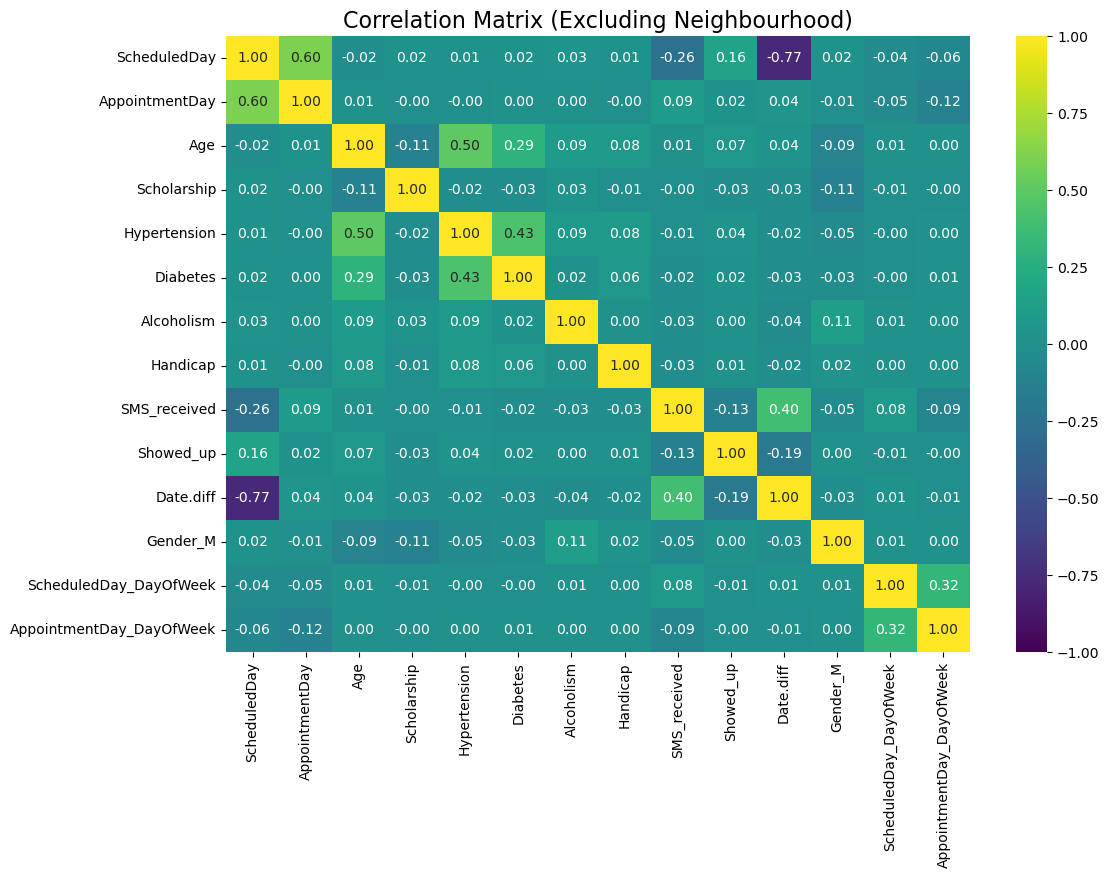

In [ ]:
# Visualize correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='viridis', vmin=-1, vmax=1)
plt.title("Correlation Matrix (Excluding Neighbourhood)", fontsize=16)
plt.show()


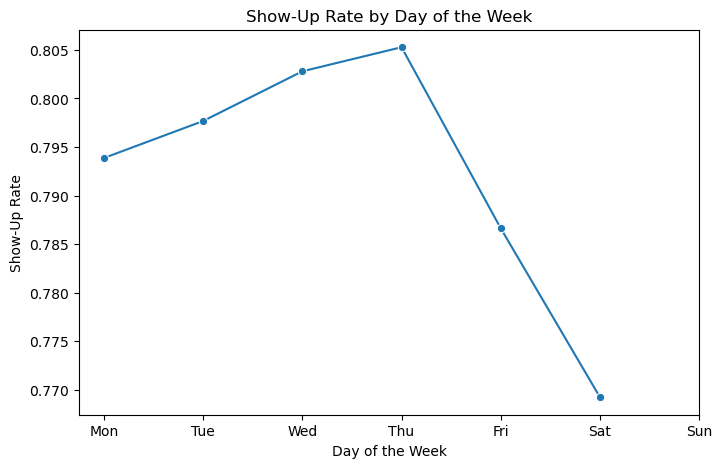

In [ ]:
# Extract relevant insights
show_rate_by_day = data.groupby('AppointmentDay_DayOfWeek')['Showed_up'].mean()
plt.figure(figsize=(8, 5))
sns.lineplot(x=show_rate_by_day.index, y=show_rate_by_day.values, marker='o')
plt.title("Show-Up Rate by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Show-Up Rate")
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_10528\98524422.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Showed_up', y='Age', data=data, palette="Set3")


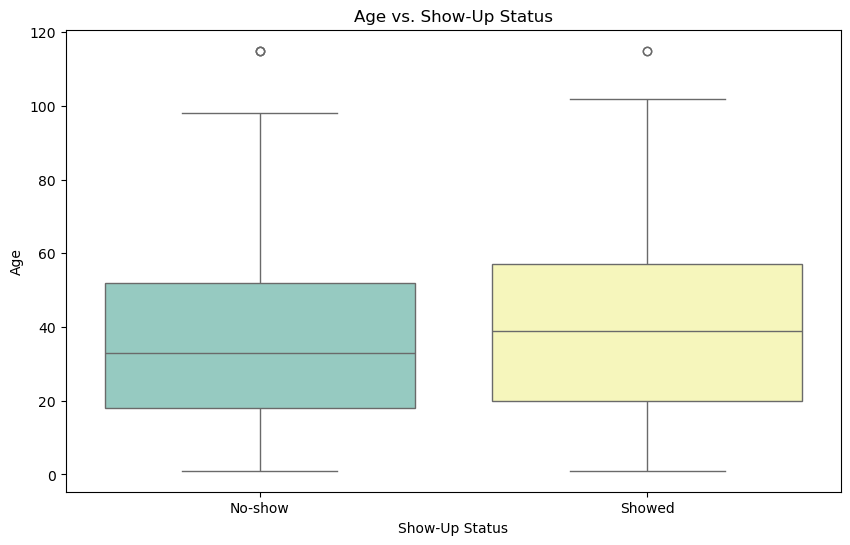

In [ ]:
# Insights from Age and Medical Conditions
plt.figure(figsize=(10, 6))
sns.boxplot(x='Showed_up', y='Age', data=data, palette="Set3")
plt.title("Age vs. Show-Up Status")
plt.xlabel("Show-Up Status")
plt.ylabel("Age")
plt.xticks([0, 1], ['No-show', 'Showed'])
plt.show()

In [ ]:
scaler = StandardScaler()

In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()


In [ ]:
# Drop the Neighbourhood column
data_without_neighbourhood.columns

Index(['ScheduledDay', 'AppointmentDay', 'Age', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'Showed_up',
       'Date.diff', 'Gender_M', 'ScheduledDay_DayOfWeek',
       'AppointmentDay_DayOfWeek'],
      dtype='object')

In [ ]:
import pandas as pd


# Define the features (X) and target variable (y)
X = data[['Age', 'Scholarship', 'Hypertension',
          'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received',
          'Date.diff', 'Gender_M', 'ScheduledDay_DayOfWeek', 'AppointmentDay_DayOfWeek']]

y = data['Showed_up']  # Target variable

In [ ]:
print(X.dtypes)

Age                         int64
Scholarship                  bool
Hypertension                 bool
Diabetes                     bool
Alcoholism                   bool
Handicap                     bool
SMS_received                 bool
Date.diff                   int64
Gender_M                     bool
ScheduledDay_DayOfWeek      int32
AppointmentDay_DayOfWeek    int32
dtype: object


In [ ]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
print("Training data size:", X_train.shape)
print("Testing data size:", X_test.shape)

Training data size: (85589, 11)
Testing data size: (21398, 11)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Initialize the model
model = RandomForestClassifier(random_state=42)

In [ ]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Detailed classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7613795681839425
Classification Report:
               precision    recall  f1-score   support

       False       0.36      0.23      0.28      4325
        True       0.82      0.90      0.86     17073

    accuracy                           0.76     21398
   macro avg       0.59      0.56      0.57     21398
weighted avg       0.73      0.76      0.74     21398



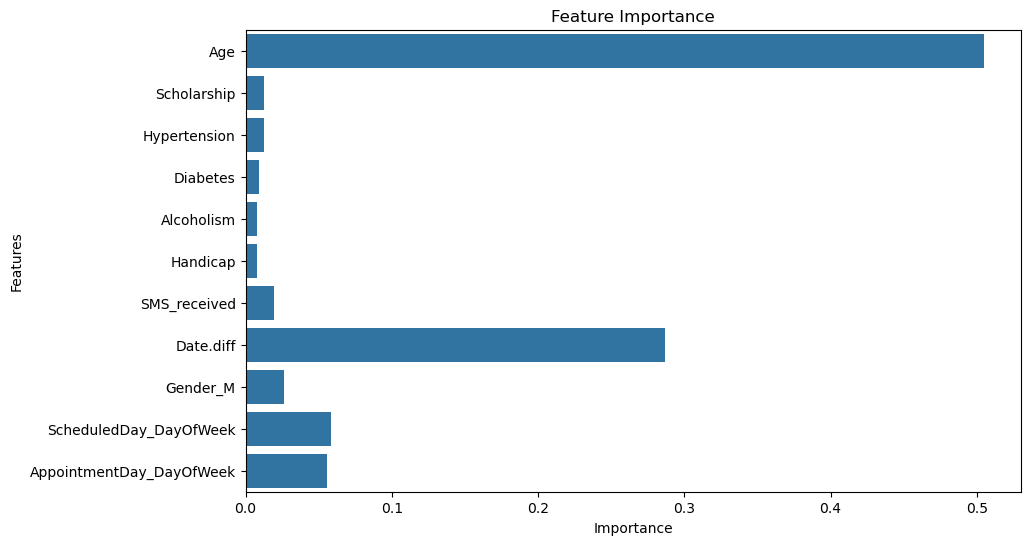

In [ ]:
# Plot feature importance
importance = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importance, y=feature_names)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

In [ ]:
# Initialize KNN
knn_model = KNeighborsClassifier(n_neighbors=5)

In [ ]:
# Train the model
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Predict
y_pred_knn = knn_model.predict(X_test)

In [ ]:
# Evaluate
print("K-Nearest Neighbors")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))


K-Nearest Neighbors
Accuracy: 0.764791101972147
Classification Report:
               precision    recall  f1-score   support

       False       0.34      0.18      0.23      4325
        True       0.81      0.91      0.86     17073

    accuracy                           0.76     21398
   macro avg       0.58      0.55      0.55     21398
weighted avg       0.72      0.76      0.73     21398



In [ ]:
# Initialize Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Predict
y_pred_gb = gb_model.predict(X_test)

# Evaluate
print("Gradient Boosting")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))


Gradient Boosting
Accuracy: 0.7980652397420319
Classification Report:
               precision    recall  f1-score   support

       False       0.58      0.00      0.01      4325
        True       0.80      1.00      0.89     17073

    accuracy                           0.80     21398
   macro avg       0.69      0.50      0.45     21398
weighted avg       0.75      0.80      0.71     21398



In [ ]:
#f1 score
f1=f1_score(y_pred_knn,y_test)
print(f1)

0.8610321119916061


In [ ]:
# Collect results into a dictionary
results = {
    "Model": ["RandomForestClassifier","KNN", "Gradient Boosting"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_gb),
        accuracy_score(y_test, y_pred)


    ]
}

# Convert to a DataFrame
results_df = pd.DataFrame(results)

# Display results
print(results_df)

                    Model  Accuracy
0  RandomForestClassifier  0.764791
1                     KNN  0.798065
2       Gradient Boosting  0.761380


In [ ]:
from sklearn.naive_bayes import BernoulliNB

bnb_model = BernoulliNB()
bnb_model.fit(X_train, y_train)
y_pred_bnb = bnb_model.predict(X_test)

print("Accuracy (Bernoulli Naive Bayes):", accuracy_score(y_test, y_pred_bnb))
print("Classification Report (Bernoulli Naive Bayes):\n", classification_report(y_test, y_pred_bnb))

Accuracy (Bernoulli Naive Bayes): 0.7978783063837742
Classification Report (Bernoulli Naive Bayes):
               precision    recall  f1-score   support

       False       0.00      0.00      0.00      4325
        True       0.80      1.00      0.89     17073

    accuracy                           0.80     21398
   macro avg       0.40      0.50      0.44     21398
weighted avg       0.64      0.80      0.71     21398



c:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.naive_bayes import BernoulliNB

bnb_model = BernoulliNB()
bnb_model.fit(X_train, y_train)
y_pred_bnb = bnb_model.predict(X_test)

print("Accuracy (Bernoulli Naive Bayes):", accuracy_score(y_test, y_pred_bnb))
print("Classification Report (Bernoulli Naive Bayes):\n", classification_report(y_test, y_pred_bnb))

Accuracy (Bernoulli Naive Bayes): 0.7978783063837742
Classification Report (Bernoulli Naive Bayes):
               precision    recall  f1-score   support

       False       0.00      0.00      0.00      4325
        True       0.80      1.00      0.89     17073

    accuracy                           0.80     21398
   macro avg       0.40      0.50      0.44     21398
weighted avg       0.64      0.80      0.71     21398



c:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Collect results into a dictionary
results = {
    "Model": ["RandomForestClassifier","KNN", "Gradient Boosting", "BernoulliNB"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_gb),
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test, y_pred_bnb)


    ]
}


In [ ]:

# Convert to a DataFrame
results_df = pd.DataFrame(results)

# Display results
print(results_df)


                    Model  Accuracy
0  RandomForestClassifier  0.764791
1                     KNN  0.798065
2       Gradient Boosting  0.761380
3             BernoulliNB  0.797878


In [ ]:
#f1 score
f1=f1_score(y_pred_knn,y_test)
print(f1)

0.8610321119916061


In [ ]:
import joblib
## Save as a pickle file
filename= 'final_model.pkl'
joblib.dump(knn_model,open(filename, 'wb'))

In [ ]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install  -r requirements.txt

Processing c:\b\abs_7e0qjcige6\croot\aext-assistant_1717062202219\work (from -r requirements.txt (line 1))
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\b\\abs_7e0qjcige6\\croot\\aext-assistant_1717062202219\\work'

